In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Data Preprocessing:

In [2]:
# Load the dataset
df = pd.read_csv("D://Talent Battle Internship//training.1600000.processed.noemoticon.csv", encoding="latin1", header=None)

In [3]:
# Assign column names
df.columns = ["target", "id", "date", "flag", "user", "text"]

In [4]:
df

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [5]:
# Display basic information about the dataset
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   id      1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB
None


In [6]:
# Display the first few rows of the dataset
print("\nFirst Few Rows:")
df.head()


First Few Rows:


,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [7]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
target    0
id        0
date      0
flag      0
user      0
text      0
dtype: int64


In [8]:
# Summary statistics for numerical features
print("\nSummary Statistics for Numerical Features:")
print(df.describe())


Summary Statistics for Numerical Features:
             target            id
count  1.600000e+06  1.600000e+06
mean   2.000000e+00  1.998818e+09
std    2.000001e+00  1.935761e+08
min    0.000000e+00  1.467810e+09
25%    0.000000e+00  1.956916e+09
50%    2.000000e+00  2.002102e+09
75%    4.000000e+00  2.177059e+09
max    4.000000e+00  2.329206e+09


In [9]:
# Distribution of target classes
print("\nTarget Class Distribution:")
print(df['target'].value_counts())


Target Class Distribution:
target
0    800000
4    800000
Name: count, dtype: int64


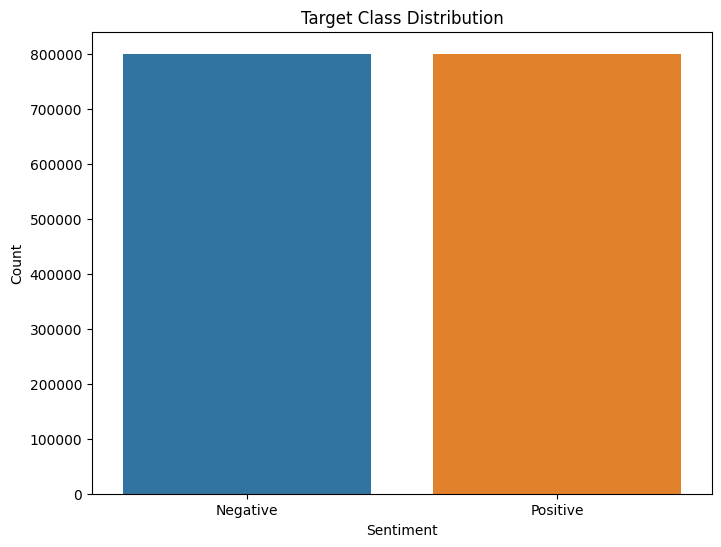

In [14]:
# Visualizing target class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df)
plt.title('Target Class Distribution')
plt.xlabel('Sentiment')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.ylabel('Count')
plt.show()

### 2. Text Preprocessing:

In [15]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Function to count number of words in each review
def count_words(text):
    return len(text.split())

In [16]:
# Text preprocessing function
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    # Remove special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)
    # Apply stemming
    stemmer = PorterStemmer()
    text = ' '.join(stemmer.stem(word) for word in text.split())
    return text

In [17]:
# Example usage
sample_text = "It's a beautiful day! Let's go for a walk."
processed_text = preprocess_text(sample_text)
print("Original Text:", sample_text)
print("Processed Text:", processed_text)

Original Text: It's a beautiful day! Let's go for a walk.
Processed Text: beauti day let go walk


### 3. Exploratory Data Analysis (EDA):

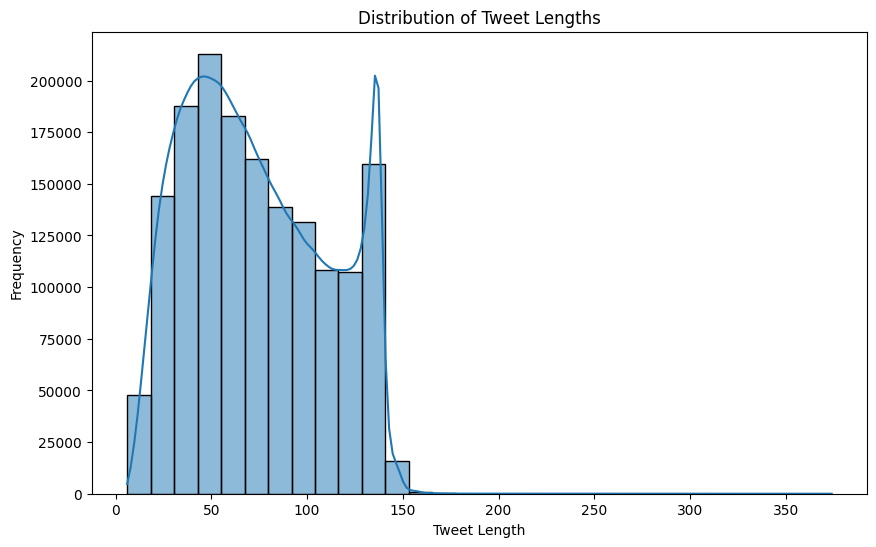

In [18]:
# Distribution of tweet lengths
df['tweet_length'] = df['text'].apply(lambda x: len(x))
plt.figure(figsize=(10, 6))
sns.histplot(df['tweet_length'], bins=30, kde=True)
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()

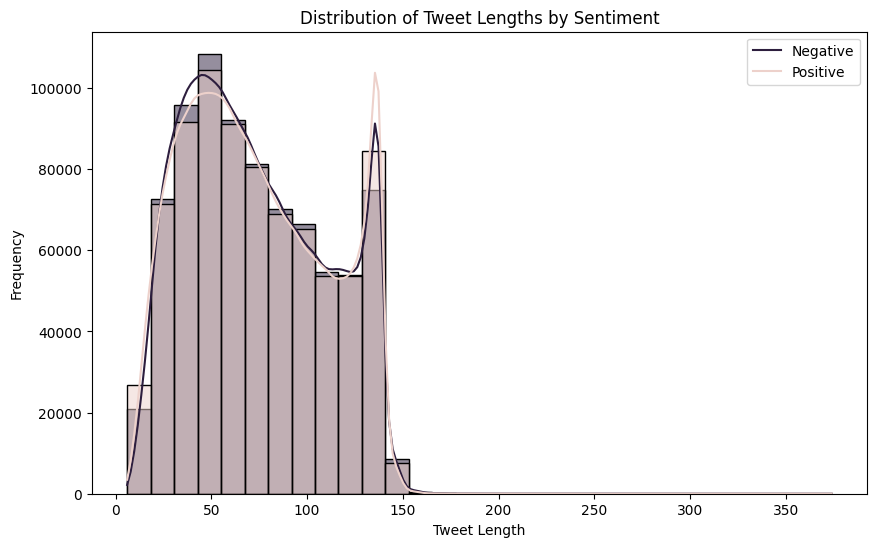

In [19]:
# Distribution of tweet lengths by sentiment
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='tweet_length', hue='target', bins=30, kde=True, alpha=0.5)
plt.title('Distribution of Tweet Lengths by Sentiment')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.legend(['Negative', 'Positive'])
plt.show()

In [20]:
# Word cloud for positive and negative tweets
from wordcloud import WordCloud

# Separate positive and negative tweets
positive_tweets = df[df['target'] == 4]['text']
negative_tweets = df[df['target'] == 0]['text']

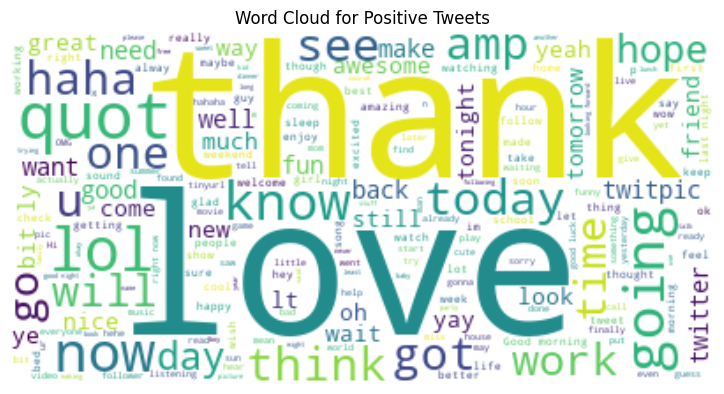

In [21]:
# Generate word clouds
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
wordcloud_positive = WordCloud(background_color='white').generate(' '.join(positive_tweets))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud for Positive Tweets')
plt.axis('off')
plt.show()

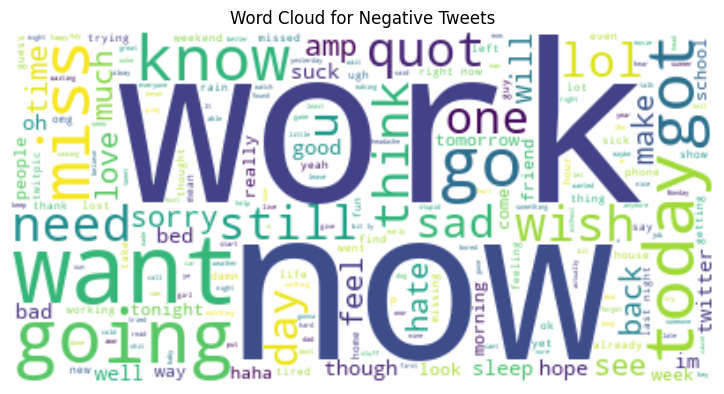

In [22]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 2)
wordcloud_negative = WordCloud(background_color='white').generate(' '.join(negative_tweets))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud for Negative Tweets')
plt.axis('off')
plt.show()

### 4. Feature Extraction:

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the text data
X_tfidf = tfidf_vectorizer.fit_transform(df['text'])

# Convert target labels to numerical format
y = df['target'].replace({4: 1})

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [25]:
import re
def model_Evaluate(model):
# Predict values for Test dataset
    y_pred = model.predict(X_test)
# Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
# Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
# lemmatizer_on_text   
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

### 5. Model Building:

### (i) Mulitnomial Naive Bayes

In [30]:
# sklearn
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

              precision    recall  f1-score   support

           0       0.76      0.78      0.77    159494
           1       0.78      0.76      0.77    160506

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000

Multinomial Naive Bayes Accuracy: 0.768971875


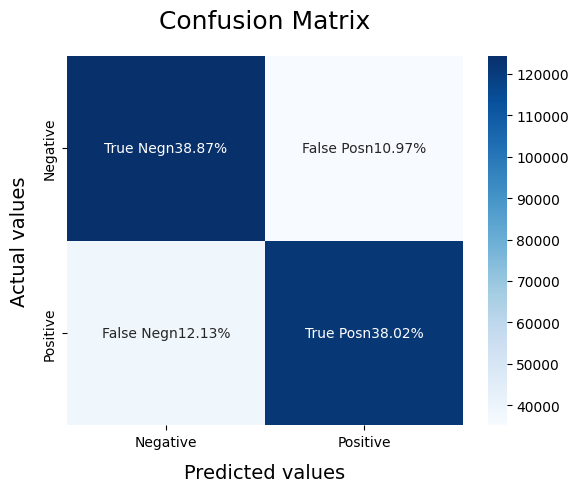

In [31]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Initialize the Multinomial Naive Bayes classifier
mnb_classifier = MultinomialNB()

# Train the classifier
mnb_classifier.fit(X_train, y_train)

# Evaluate model
model_Evaluate(mnb_classifier)

# Predictions on the test set
mnb_preds = mnb_classifier.predict(X_test)

# Evaluate accuracy
mnb_accuracy = accuracy_score(y_test, mnb_preds)
print("Multinomial Naive Bayes Accuracy:", mnb_accuracy)

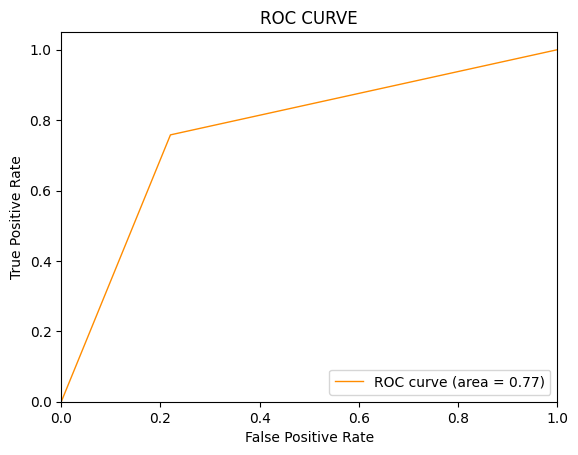

In [32]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, mnb_preds)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

### (ii) Bernoulli Naive Bayes

              precision    recall  f1-score   support

           0       0.77      0.76      0.77    159494
           1       0.77      0.78      0.77    160506

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



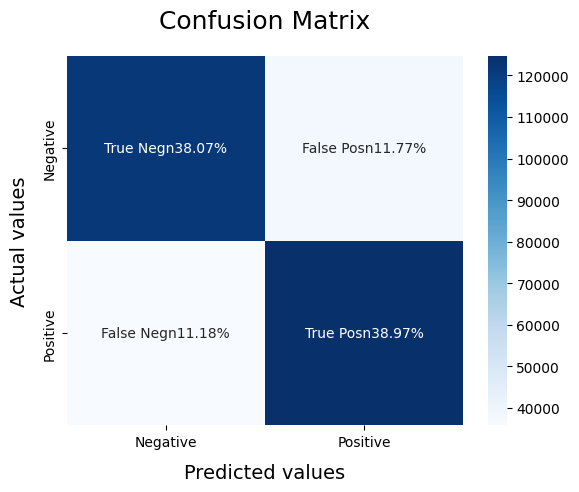

In [33]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

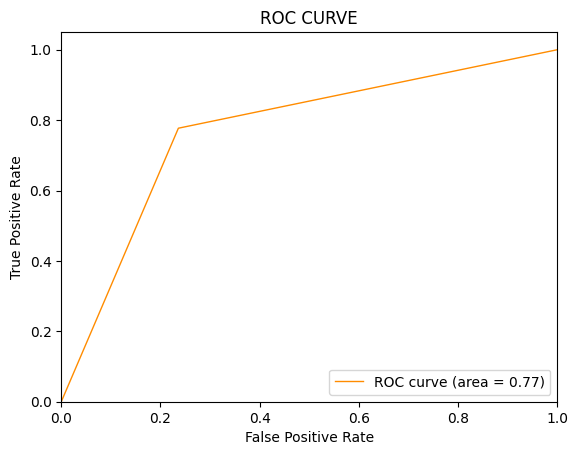

In [34]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

### Support Vector Machine (SVM)

C:\Users\Sumit\anaconda3\envs\IS2-DL\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.80      0.77      0.79    159494
           1       0.78      0.81      0.79    160506

    accuracy                           0.79    320000
   macro avg       0.79      0.79      0.79    320000
weighted avg       0.79      0.79      0.79    320000



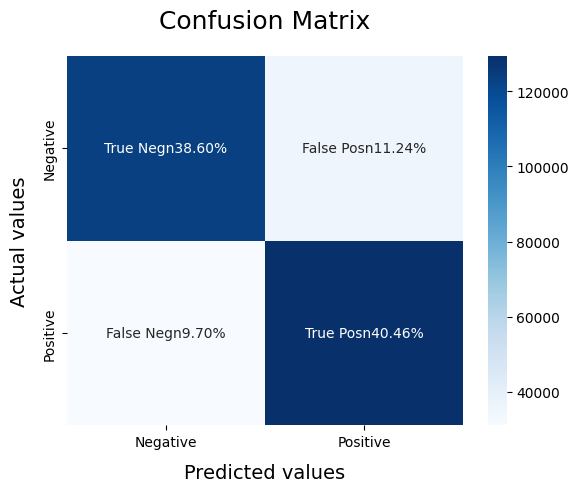

In [35]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

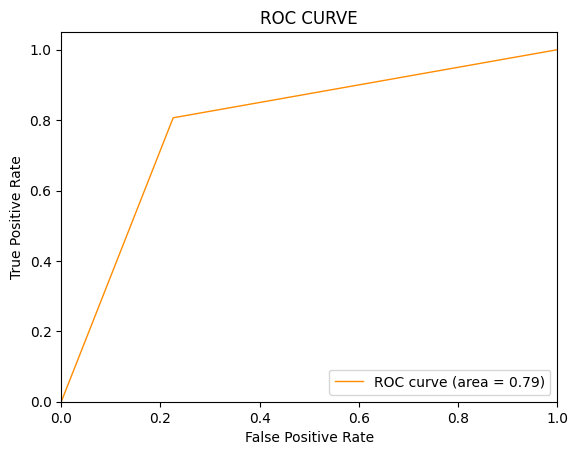

In [36]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

### Logistic Regression (LR)

              precision    recall  f1-score   support

           0       0.80      0.78      0.79    159494
           1       0.78      0.80      0.79    160506

    accuracy                           0.79    320000
   macro avg       0.79      0.79      0.79    320000
weighted avg       0.79      0.79      0.79    320000



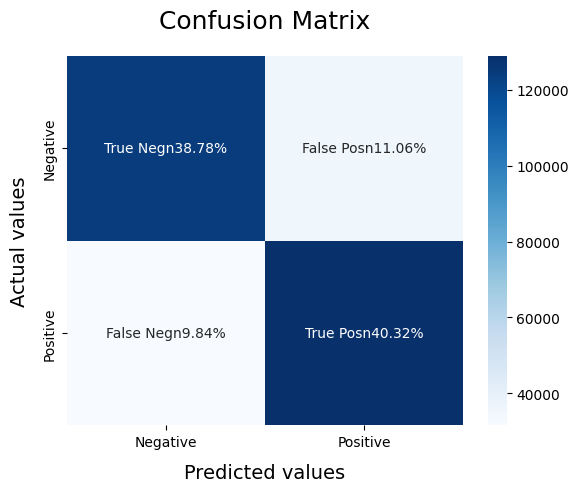

In [37]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

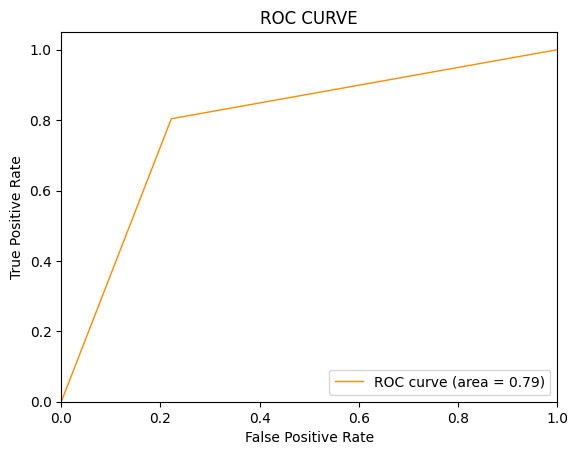

In [38]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

### 6. Deep Learning Models:

In [39]:
from keras.models import Sequential
from keras.layers import Dense

# Initialize FFNN model
ffnn_model = Sequential([
    Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
ffnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
ffnn_history = ffnn_model.fit(X_train.toarray(), y_train, epochs=10, batch_size=196, validation_split=0.2, verbose=1)

# Evaluate the model on test set
ffnn_loss, ffnn_accuracy = ffnn_model.evaluate(X_test.toarray(), y_test)
print("Feedforward Neural Network Accuracy:", ffnn_accuracy)

C:\Users\Sumit\anaconda3\envs\IS2-DL\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
5225/5225 ━━━━━━━━━━━━━━━━━━━━ 33s 6ms/step - accuracy: 0.7757 - loss: 0.4687 - val_accuracy: 0.8023 - val_loss: 0.4258
Epoch 2/10
5225/5225 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step - accuracy: 0.8149 - loss: 0.4048 - val_accuracy: 0.8068 - val_loss: 0.4179
Epoch 3/10
5225/5225 ━━━━━━━━━━━━━━━━━━━━ 26s 5ms/step - accuracy: 0.8383 - loss: 0.3661 - val_accuracy: 0.8057 - val_loss: 0.4219
Epoch 4/10
5225/5225 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step - accuracy: 0.8601 - loss: 0.3264 - val_accuracy: 0.8004 - val_loss: 0.4435
Epoch 5/10
5225/5225 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step - accuracy: 0.8792 - loss: 0.2877 - val_accuracy: 0.7953 - val_loss: 0.4763
Epoch 6/10
5225/5225 ━━━━━━━━━━━━━━━━━━━━ 30s 6ms/step - accuracy: 0.8954 - loss: 0.2519 - val_accuracy: 0.7882 - val_loss: 0.5253
Epoch 7/10
5225/5225 ━━━━━━━━━━━━━━━━━━━━ 31s 6ms/step - accuracy: 0.9082 - loss: 0.2234 - val_accuracy: 0.7858 - val_loss: 0.5980
Epoch 8/10
5225/5225 ━━━━━━━━━━━━━━━━━━━━ 28s 5ms/step - accuracy: 0.9171 - loss: 0

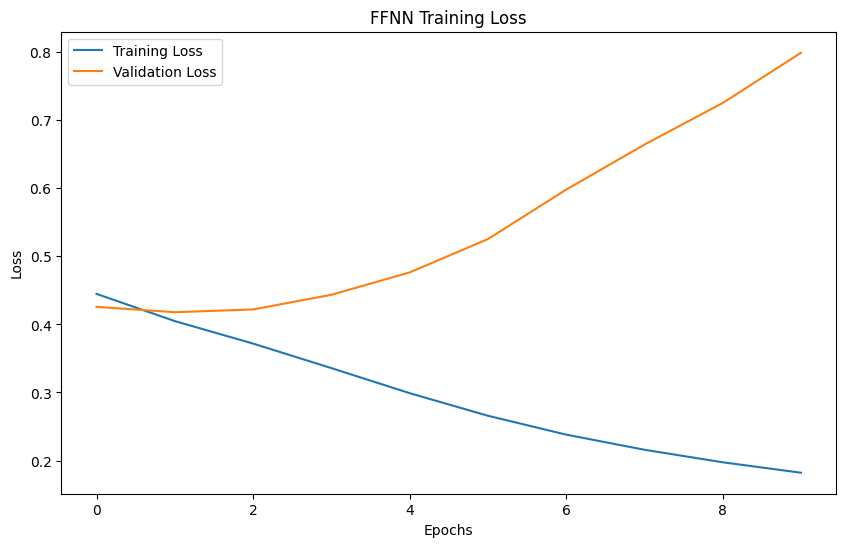

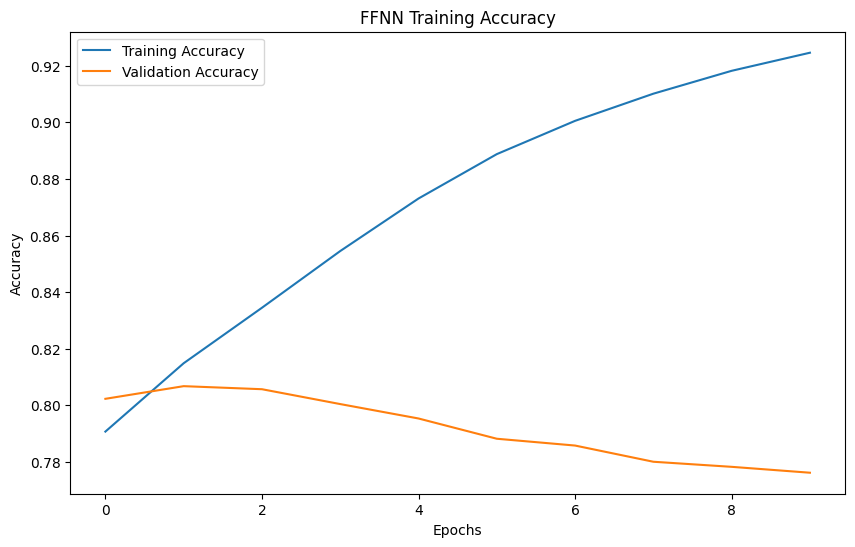

In [40]:
# Plot training loss
plt.figure(figsize=(10, 6))
plt.plot(ffnn_history.history['loss'], label='Training Loss')
plt.plot(ffnn_history.history['val_loss'], label='Validation Loss')
plt.title('FFNN Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training accuracy
plt.figure(figsize=(10, 6))
plt.plot(ffnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(ffnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('FFNN Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### 7. Graphical User Interface (GUI):

In [41]:
import tkinter as tk
from tkinter import messagebox
from keras.preprocessing.sequence import pad_sequences

# Function to preprocess input text
def preprocess_input(text):
    processed_text = preprocess_text(text)  # Assuming preprocess_text function is defined earlier
    sequence = tfidf_vectorizer.transform([processed_text])
    return sequence

# Function to predict sentiment
def predict_sentiment():
    input_text = entry.get()
    if not input_text:
        messagebox.showerror("Error", "Please enter a sentence.")
        return
    sequence = preprocess_input(input_text)
    # Make prediction using the FFNN model
    prediction = ffnn_model.predict(sequence)
    # Interpret prediction
    if prediction[0][0] >= 0.5:
        sentiment = "Positive"
    else:
        sentiment = "Negative"
    messagebox.showinfo("Sentiment Prediction", f"The sentiment of the input sentence is: {sentiment}")

# Create main application window
root = tk.Tk()
root.title("Sentiment Analysis")
root.geometry("400x150")

# Create entry widget for user input
label = tk.Label(root, text="Enter a sentence:")
label.pack()
entry = tk.Entry(root, width=50)
entry.pack()

# Create predict button
predict_button = tk.Button(root, text="Predict Sentiment", command=predict_sentiment)
predict_button.pack()

# Run the GUI
root.mainloop()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
